# Census Income

Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.


Description of fnlwgt (final weight)


The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. 
We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Census%20Income/Census%20Income.csv




In [1]:
# Import neccessory libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import  matplotlib.pyplot  as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data set

df=pd.read_csv(r"C:\Assignements & HW\Internship\project1\Evaluation Phase\Third phase/Census Income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# Check the dimension of the dataset

df.shape

(32560, 15)

In [4]:
# Checking the columns of the datasdet

df.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [5]:
# check the data type of all columns

df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [6]:
# checking the null values

df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<Axes: >

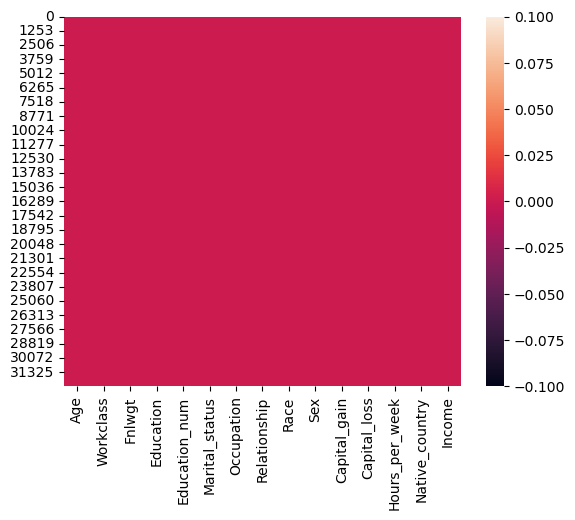

In [8]:
# Let's the visualize the null values using heatmap

sns.heatmap(df.isnull())

check all the categorical columns or hold the object data type

In [9]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [34]:
df.replace(' ?', np.nan, inplace=True)

In [11]:
df['Education'].unique()


array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [12]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [15]:
df['Marital_status'].nunique()

7

In [16]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [36]:
df.replace(' ?', np.nan, inplace=True)

In [18]:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [19]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [20]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [21]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [38]:
df.replace(' ?', np.nan, inplace=True)

In [39]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [40]:
# checking the value counts of each column 

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


9     10501
10   

In [41]:
df.iloc[588,:]

Age                            57
Workclass            Self-emp-inc
Fnlwgt                     103948
Education               Bachelors
Education_num                  13
Marital_status           Divorced
Occupation         Prof-specialty
Relationship        Not-in-family
Race                        White
Sex                          Male
Capital_gain                    0
Capital_loss                    0
Hours_per_week                 80
Native_country      United-States
Income                      <=50K
Name: 588, dtype: object

In [42]:
# Seperating Numerical and Categorical columns

#Checking for Categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical column ", categorical_col)
print("\n")

#Checking for Numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical column ", numerical_col)


Categorical column  ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Numerical column  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [43]:
# Checking number of unique values in each column 
df.nunique().to_frame(" Number of unique value ")

,Number of unique value
Age,73
Workclass,8
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,14
Relationship,6
Race,5
Sex,2


In [44]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [45]:
# fill the nan with mode method because it's object data type

df["Workclass"]=df["Workclass"].fillna(df["Workclass"].mode()[0])
df["Occupation"]=df["Occupation"].fillna(df["Occupation"].mode()[0])
df["Native_country"]=df["Native_country"].fillna(df["Native_country"].mode()[0])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [47]:
# Checking the list of counts of target

df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [48]:
# Checking the unique values in the target column 
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [49]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


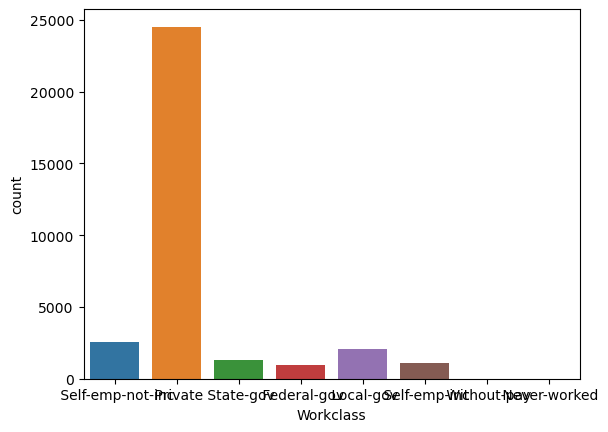

In [50]:
# Visualize the workclass

ax = sns.countplot(x='Workclass', data=df)
print(df['Workclass'].value_counts())

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


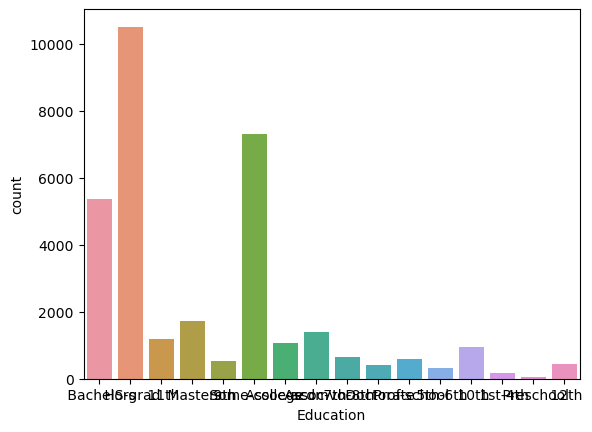

In [51]:
# Visualize the education

ax = sns.countplot(x='Education', data=df)
print(df['Education'].value_counts())

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


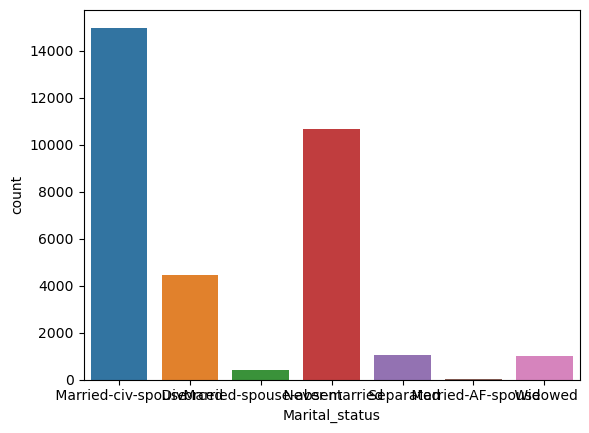

In [52]:
# Visualize the marital_status

ax = sns.countplot(x='Marital_status', data=df)
print(df['Marital_status'].value_counts())

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


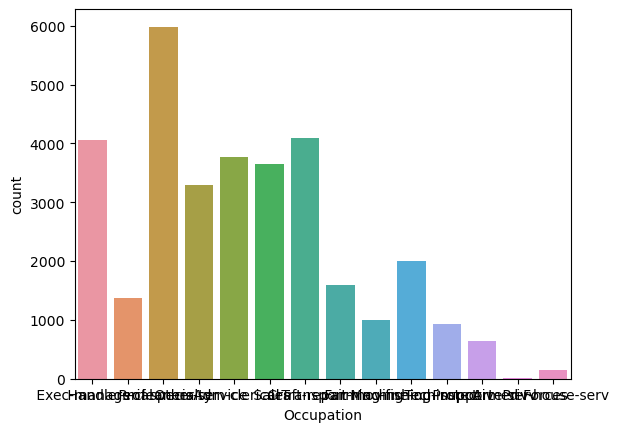

In [53]:
# Visualize the occupation

ax = sns.countplot(x='Occupation', data=df)
print(df['Occupation'].value_counts())

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


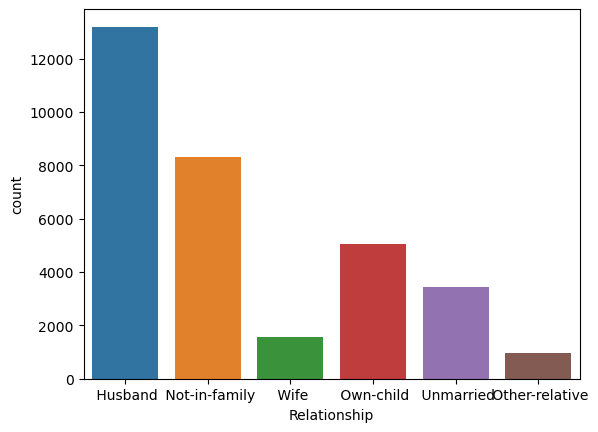

In [54]:
# Visualize the relationship

ax = sns.countplot(x='Relationship', data=df)
print(df['Relationship'].value_counts())

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


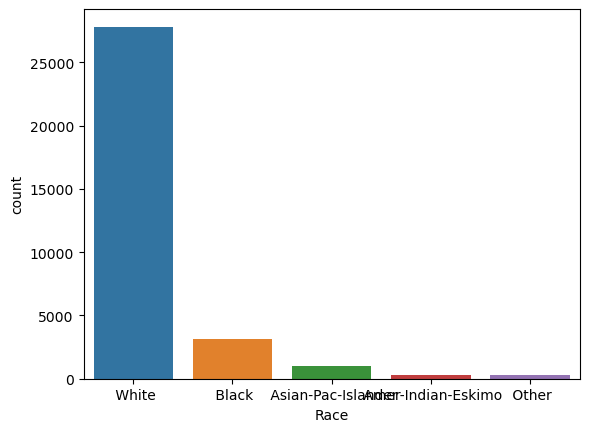

In [55]:
# Visualize the Race

ax = sns.countplot(x='Race', data=df)
print(df['Race'].value_counts())

 Male      21789
 Female    10771
Name: Sex, dtype: int64


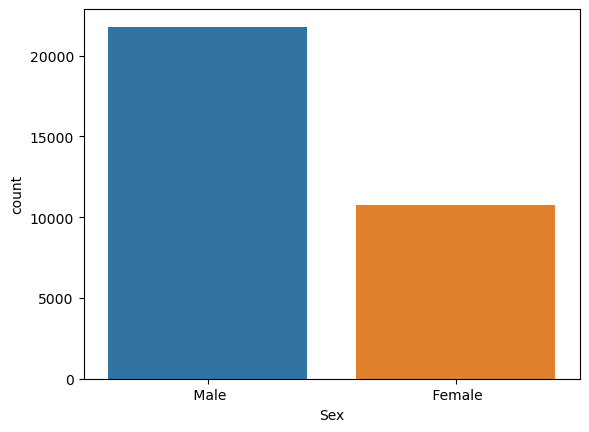

In [56]:
# Visualize the Sex

ax = sns.countplot(x='Sex', data=df)
print(df['Sex'].value_counts())

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

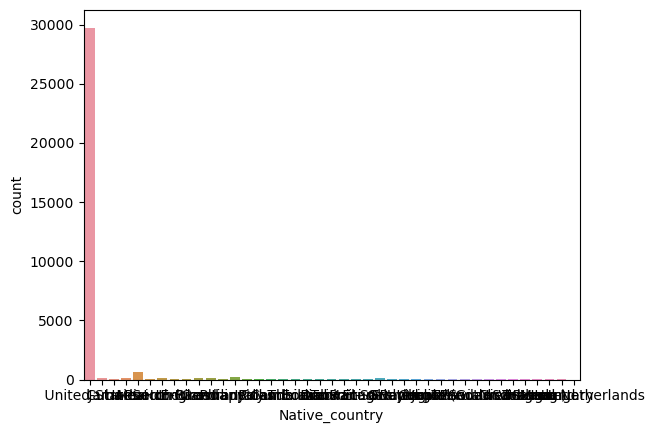

In [57]:
# Visualize the native country 

ax = sns.countplot(x='Native_country', data=df)
print(df['Native_country'].value_counts())

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


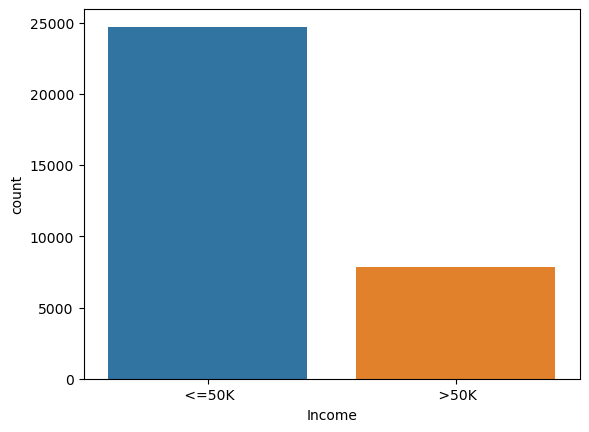

In [58]:
# Visualize the income

ax = sns.countplot(x='Income', data=df)
print(df['Income'].value_counts())

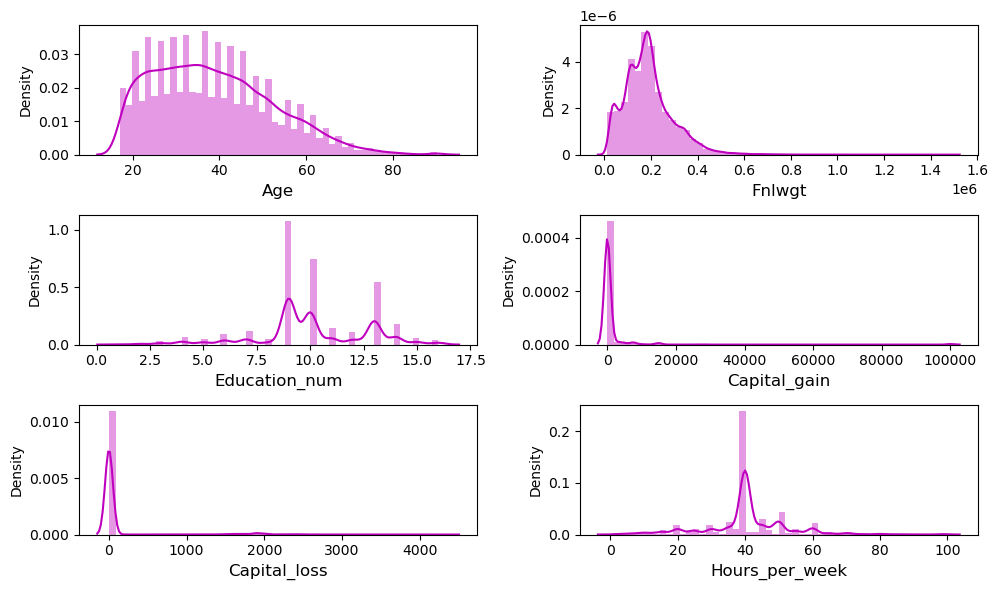

In [59]:
# Let’s check how the data has been distributed in remaining column

plt.figure (figsize=(10,6) , facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber <= 6:
        ax = plt.subplot(3, 2, plotnumber)
        sns.distplot(df[col], color = "m")
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0 , fontsize = 10)
    plotnumber +=1
plt.tight_layout()


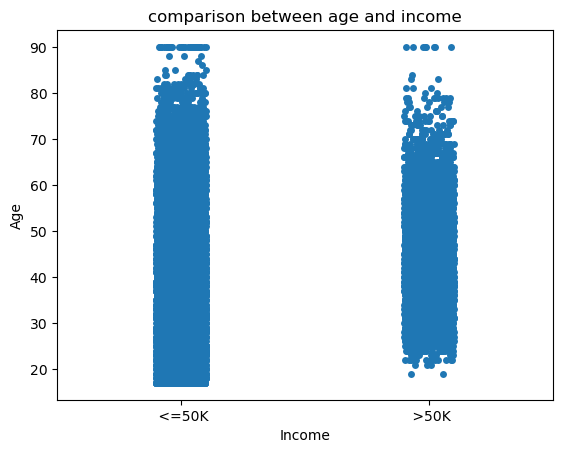

In [60]:
# Compare age and income

plt.title("comparison between age and income")
sns.stripplot( x = "Income" , y = "Age",  data = df)
plt.show()


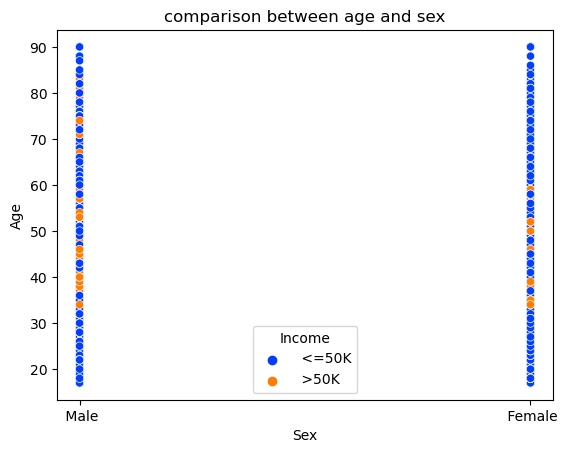

In [61]:
# Compare Income and sex

plt.title("comparison between age and sex")
sns.scatterplot( x="Sex", y="Age",  data = df , hue='Income', palette = 'bright')
plt.show()


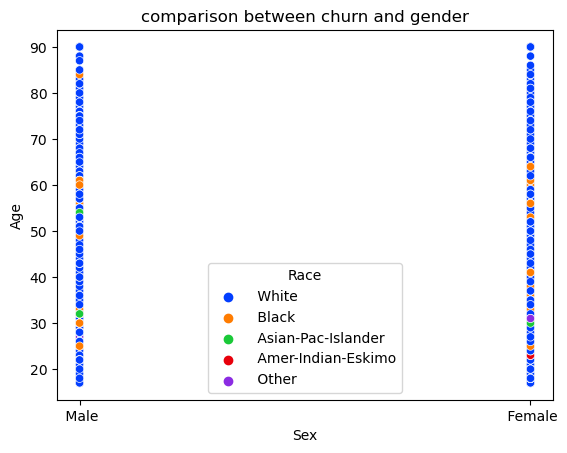

In [62]:
# Compare Income and sex




plt.title("comparison between churn and gender")
sns.scatterplot( x="Sex", y="Age",  data = df , hue='Race' , palette = "bright")
plt.show()



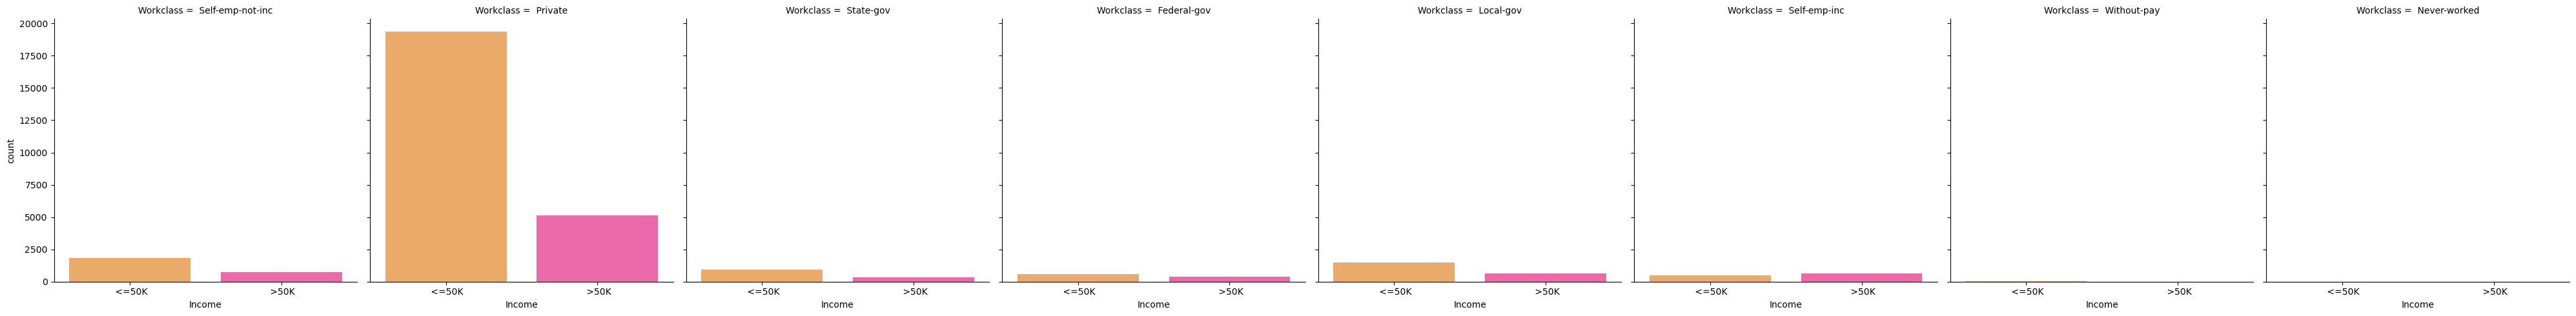

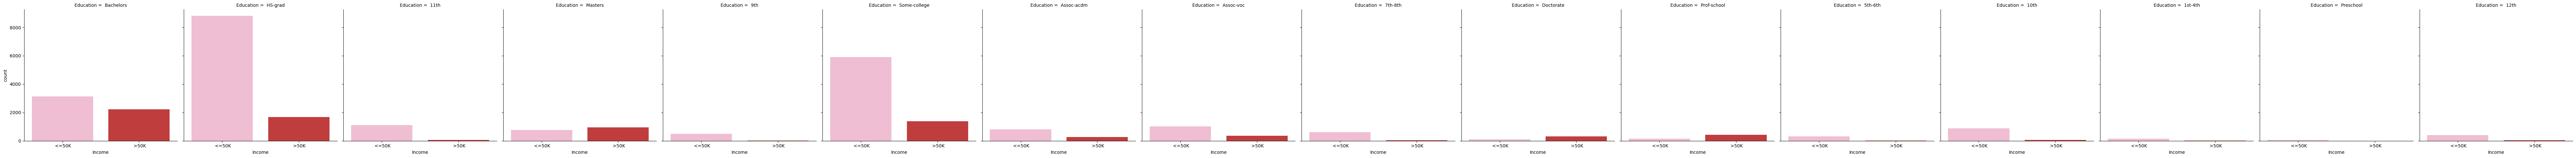

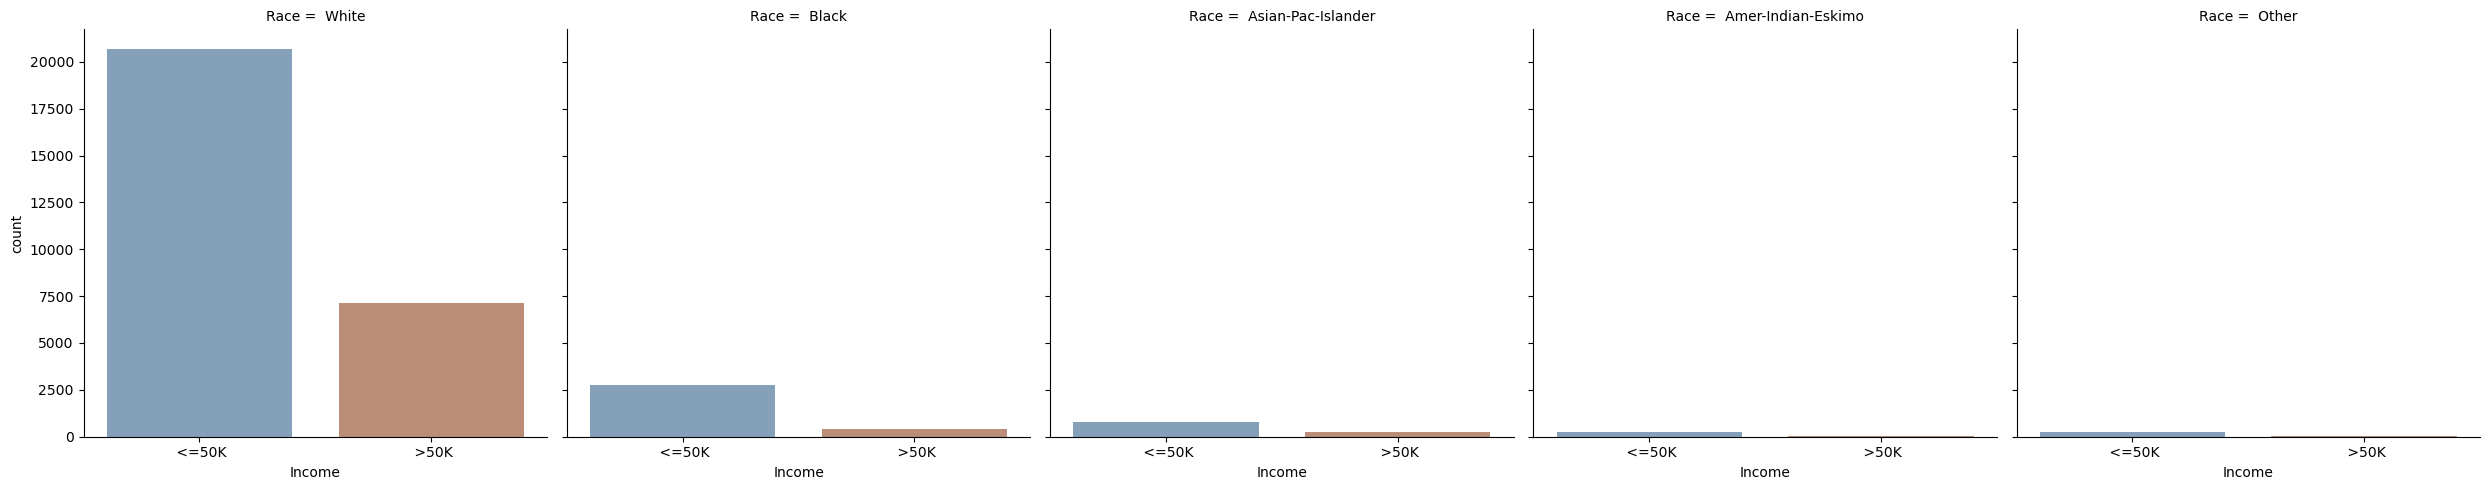

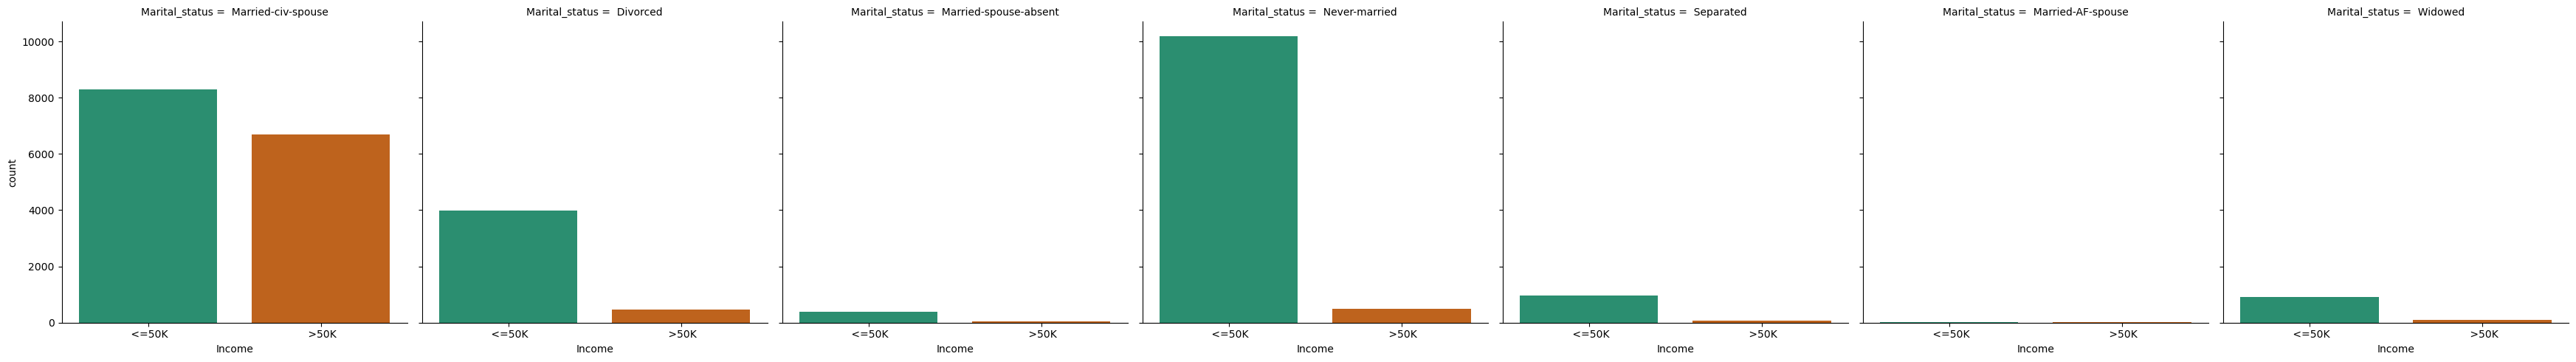

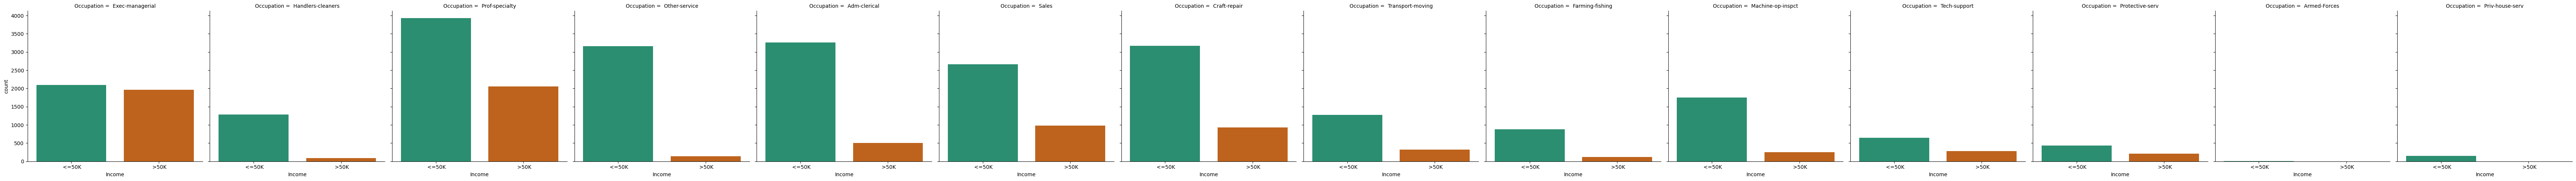

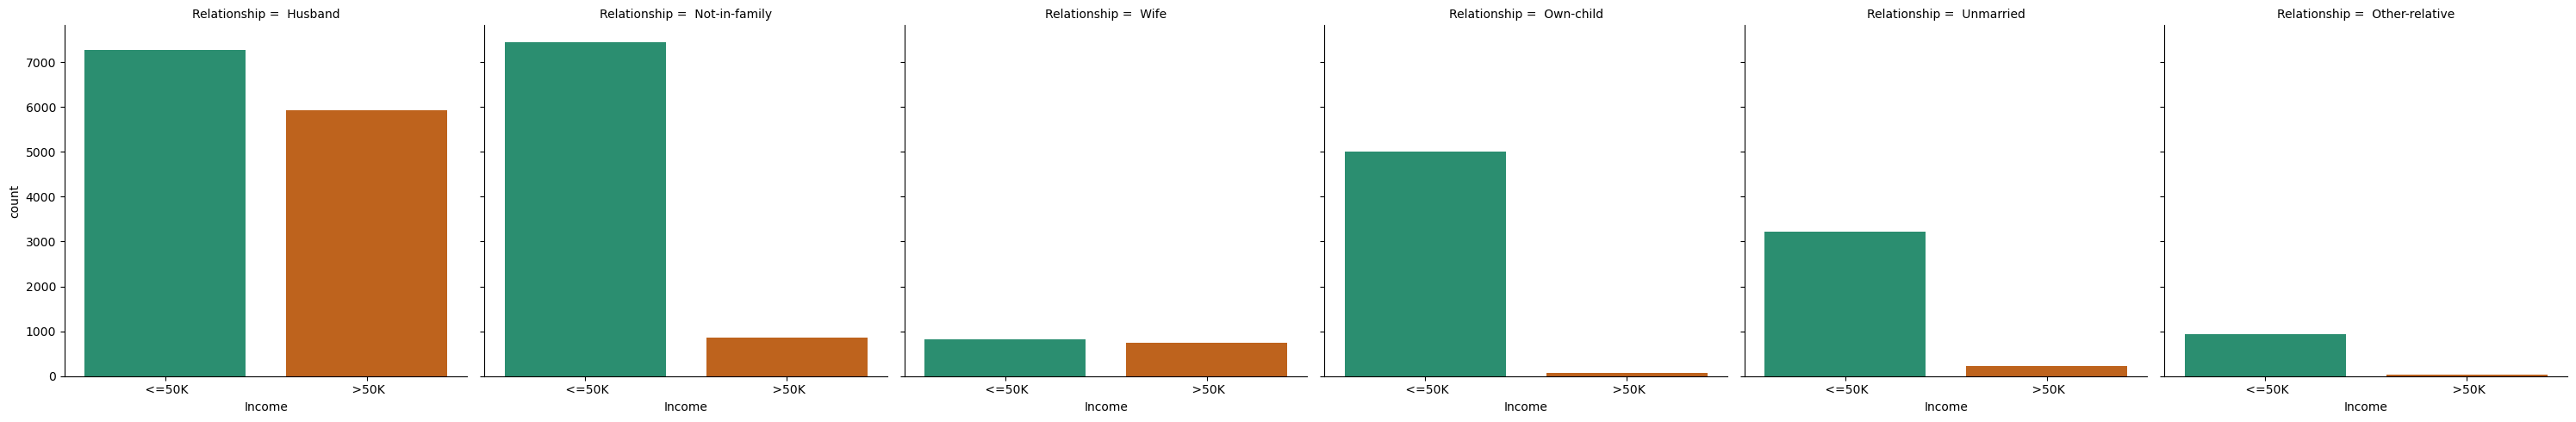

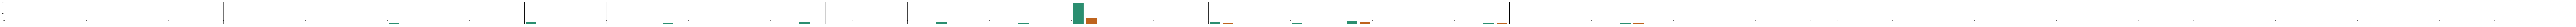

In [63]:
# Checking Income lavel and workclass
sns.catplot( x = 'Income', col = 'Workclass', data = df , kind = "count" , palette = "spring_r")

# Checking Income lavel and education 
sns.catplot( x = 'Income', col = 'Education', data = df , kind = "count" , palette = "tab20_r")

# Checking Income lavel and race
sns.catplot( x = 'Income', col = 'Race', data = df , kind = "count" , palette = "twilight_shifted")

# Checking Income lavel and marital status
sns.catplot( x = 'Income', col = 'Marital_status', data = df , kind = "count" , palette = "Dark2")

# Checking Income lavel and  occupation
sns.catplot( x = 'Income', col = 'Occupation', data = df , kind = "count" , palette = "Dark2")

# Checking Income lavel and  relationship
sns.catplot( x = 'Income', col = 'Relationship', data = df , kind = "count" , palette = "Dark2")

# Checking Income lavel and  hours per week
sns.catplot( x = 'Income', col = 'Hours_per_week', data = df , kind = "count" , palette = "Dark2")


# Multivariate Analysis

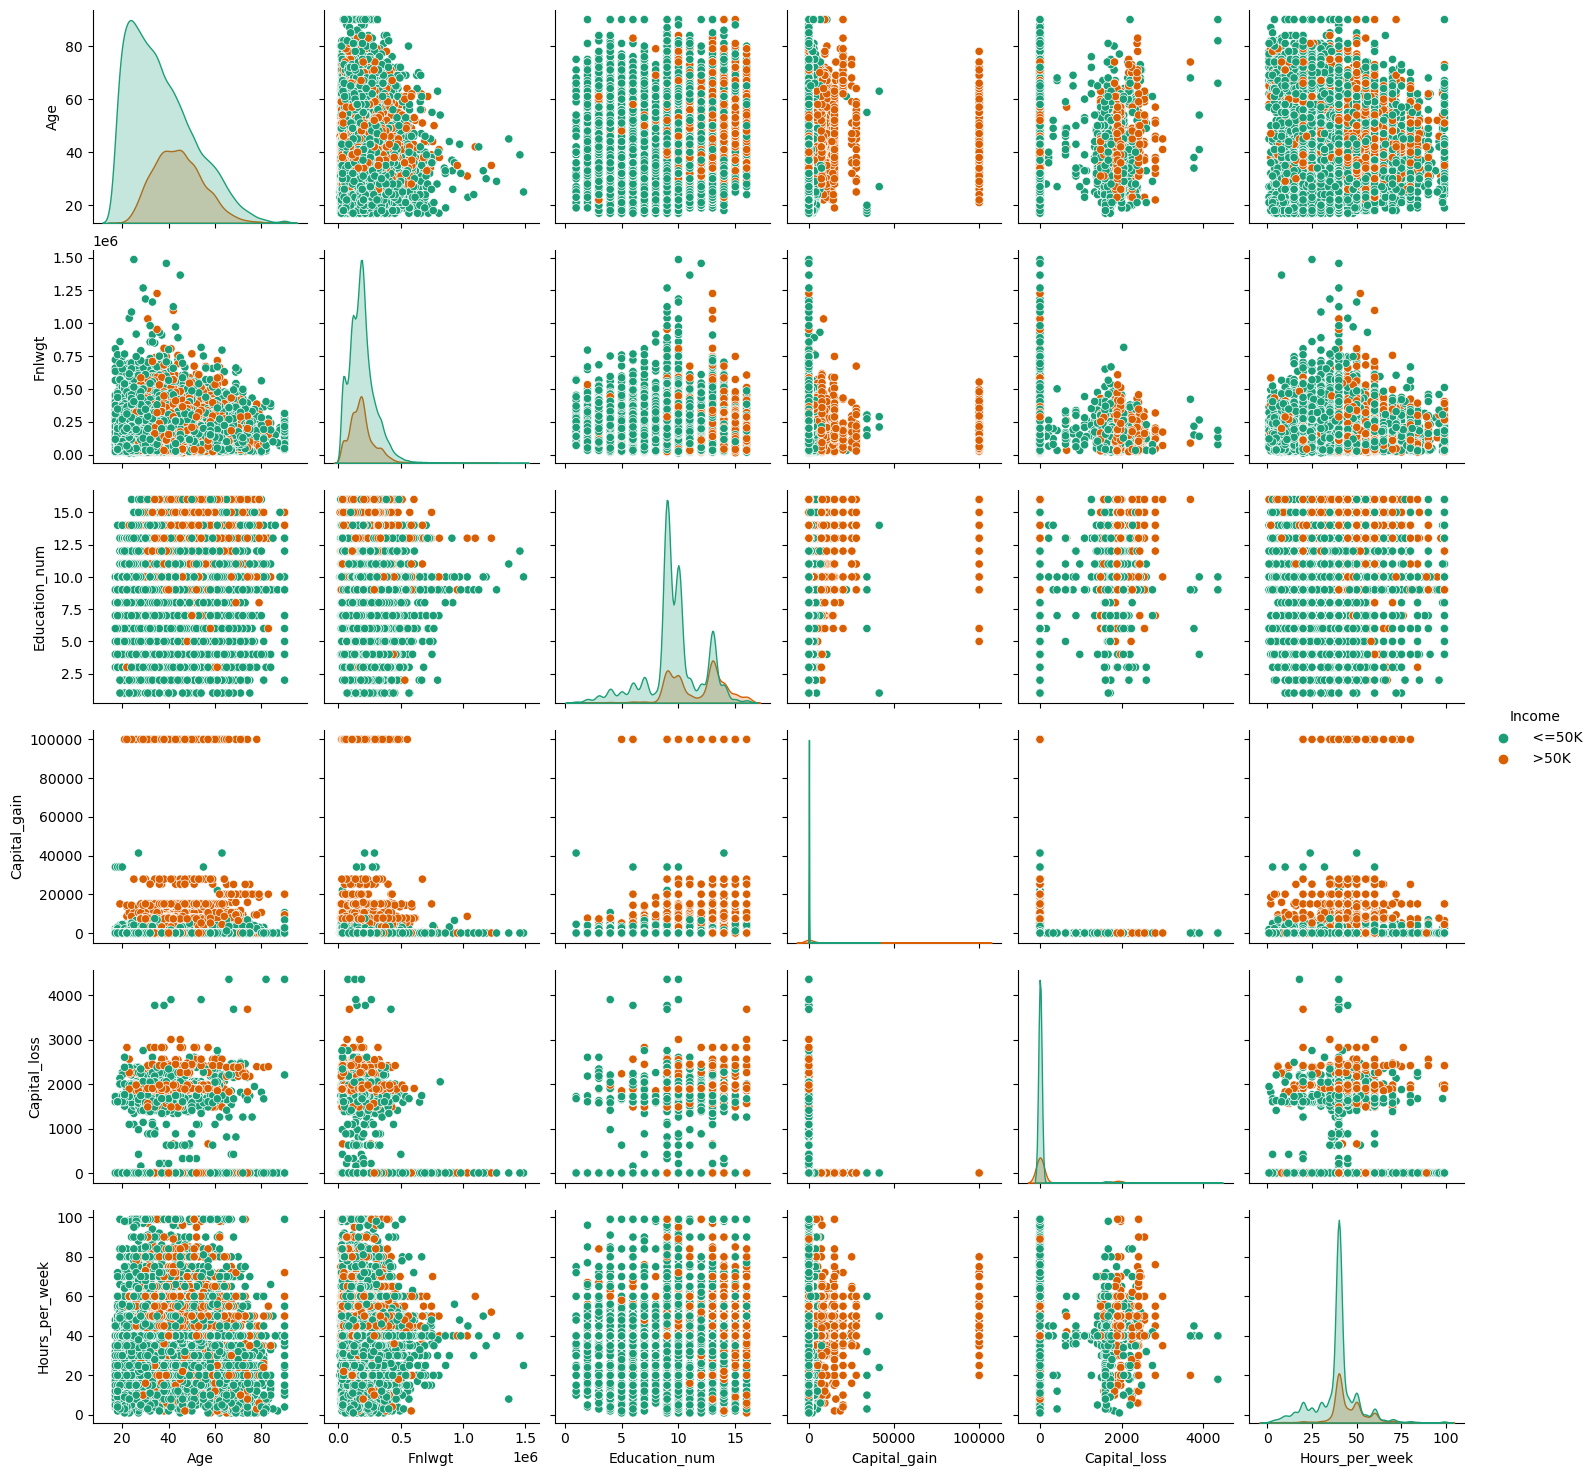

In [64]:
sns.pairplot(df , hue = "Income" ,  palette = "Dark2")
plt.show()


# Checking for outliers

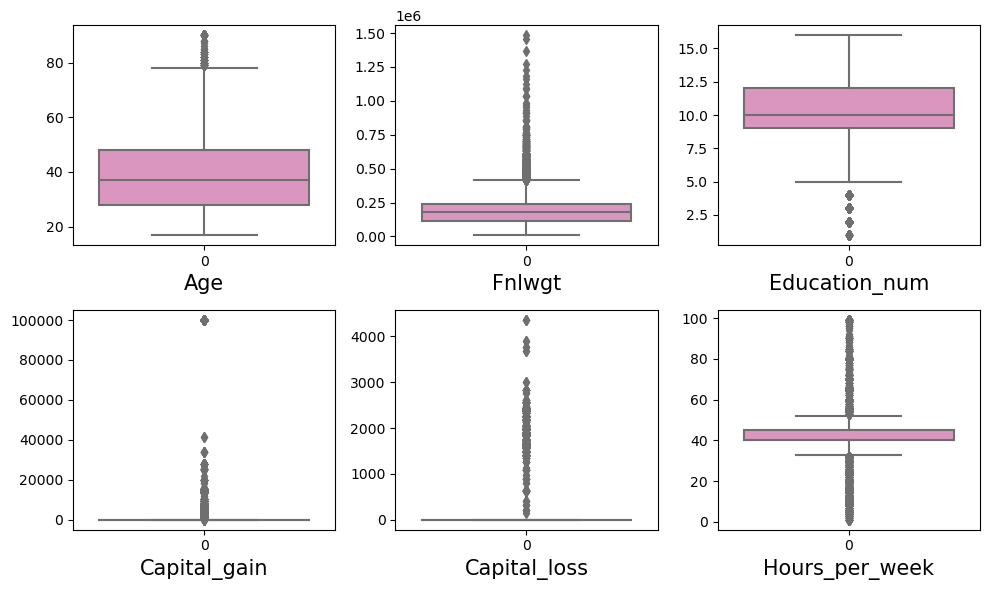

In [65]:
# let’s check the outliers by ploting  boxplot.
plt.figure(figsize = (10, 6),  facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber <=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.boxplot(df[col],palette="Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber +=1
plt.tight_layout()
        


# Checking for skewness

# # Encoding categorical columns

In [66]:
# Encoding categorical columns using ordinal encoder 
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0.0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0.0
3,28,3.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0.0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0.0
32556,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1.0
32557,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0.0
32558,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,38.0,0.0


In [67]:
df.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
Income             1.212383
dtype: float64

# Removing skewness

In [68]:
# Removing skewness using cube root method

df['Capital_gain']= np.cbrt(df['Capital_gain'])
# Removing skewness using cube root method

df['Capital_loss']= np.cbrt(df['Capital_loss'])


In [69]:
df.skew()

Age               0.558738
Workclass         0.076178
Fnlwgt            1.446972
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.000536
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      4.100150
Capital_loss      4.336999
Hours_per_week    0.227636
Native_country   -4.243083
Income            1.212383
dtype: float64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32560 non-null  int64  
 1   Workclass       32560 non-null  float64
 2   Fnlwgt          32560 non-null  int64  
 3   Education       32560 non-null  float64
 4   Education_num   32560 non-null  int64  
 5   Marital_status  32560 non-null  float64
 6   Occupation      32560 non-null  float64
 7   Relationship    32560 non-null  float64
 8   Race            32560 non-null  float64
 9   Sex             32560 non-null  float64
 10  Capital_gain    32560 non-null  float64
 11  Capital_loss    32560 non-null  float64
 12  Hours_per_week  32560 non-null  int64  
 13  Native_country  32560 non-null  float64
 14  Income          32560 non-null  float64
dtypes: float64(11), int64(4)
memory usage: 3.7 MB


# Correlation between target variable and independent variables.

In [71]:
cor = df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,-0.010508,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.124537,0.052890,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.024255,0.004901,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.022621,0.000203,0.042206,-0.001646,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,-0.003151,-0.009382,-0.018770,-0.063279,-0.009481
Education,-0.010508,0.004901,-0.028156,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,-0.027349,0.030797,0.016781,0.055510,0.076062,0.079311
Education_num,0.036527,0.003445,-0.043159,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.148259,0.078084,0.148127,0.088887,0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.068302,-0.035627,-0.190521,-0.021285,-0.199295
Occupation,0.001740,0.007236,0.000138,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.014745,0.009754,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,0.008922,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.086298,-0.058887,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.021278,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.022891,0.018584,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.026882,-0.027349,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.071816,0.043820,0.229312,0.002055,0.215995


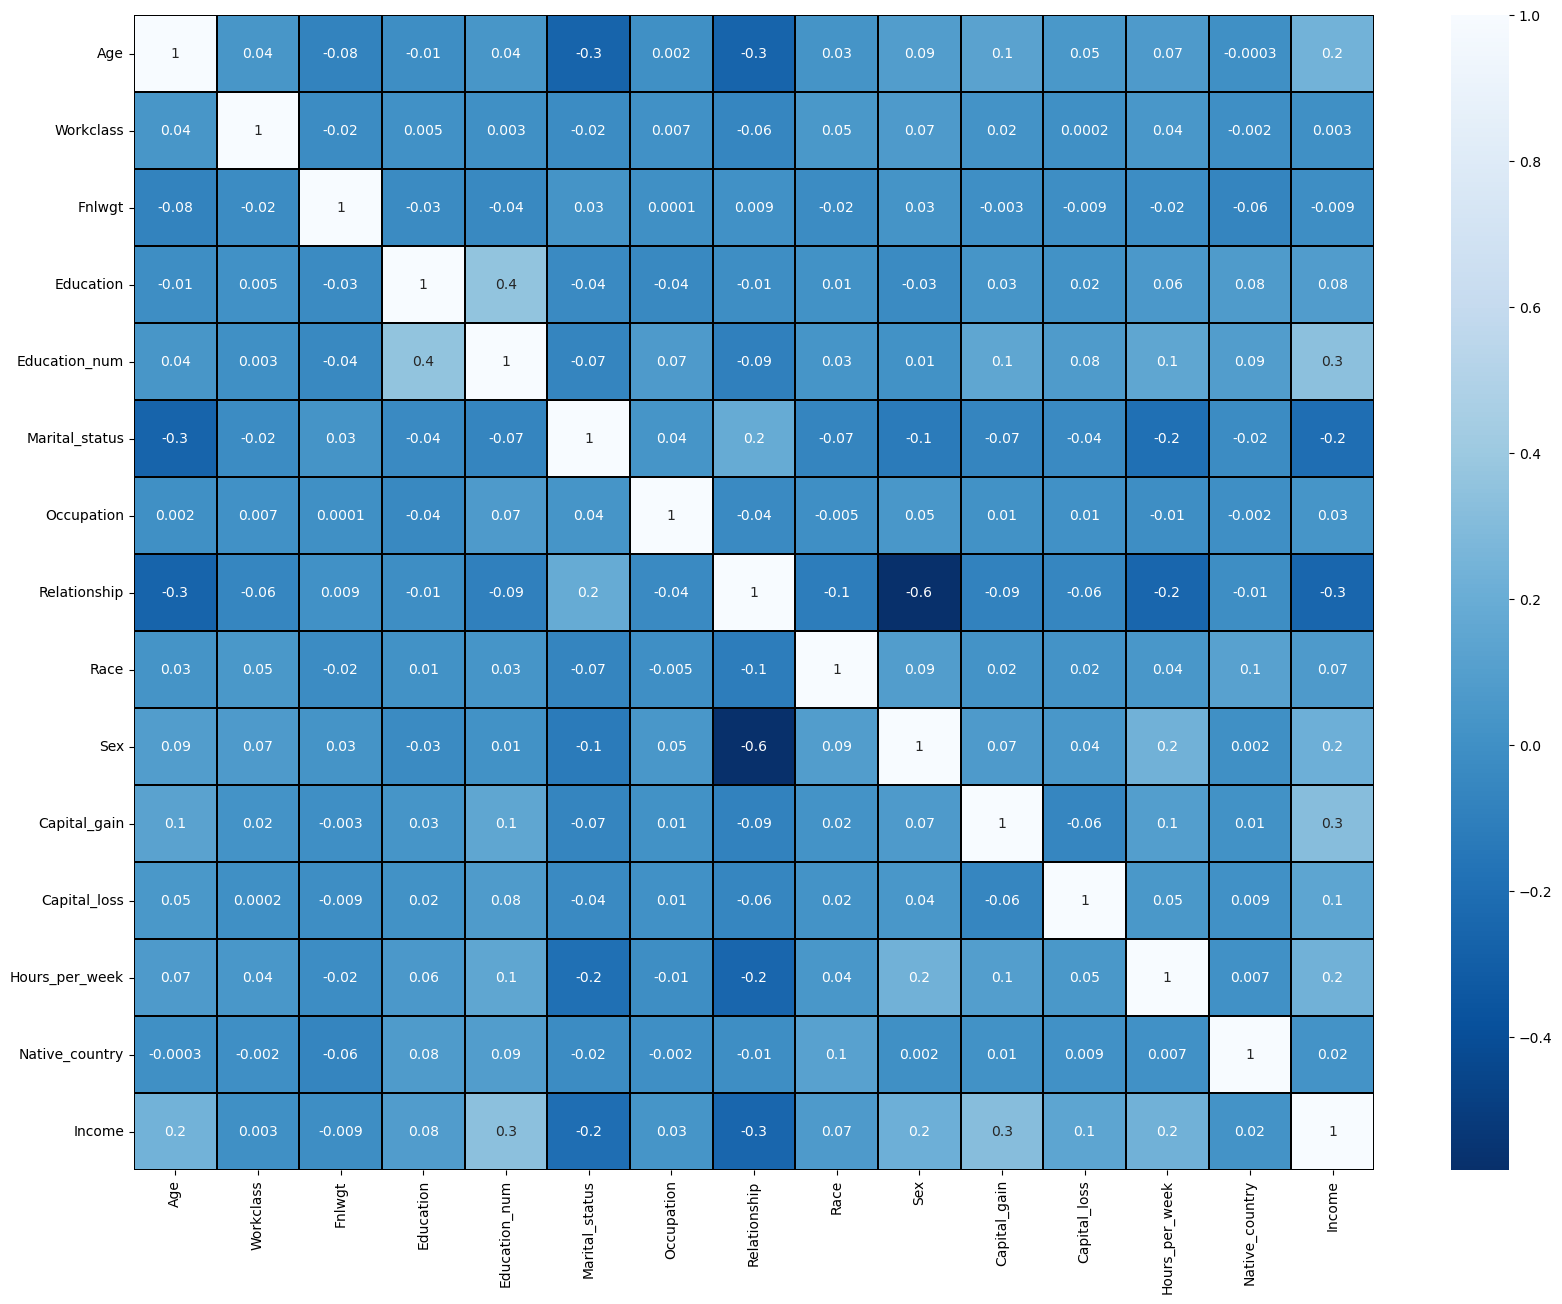

In [72]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0);
plt.show()


#  Visualizing the correlation between  label and features using bar plot

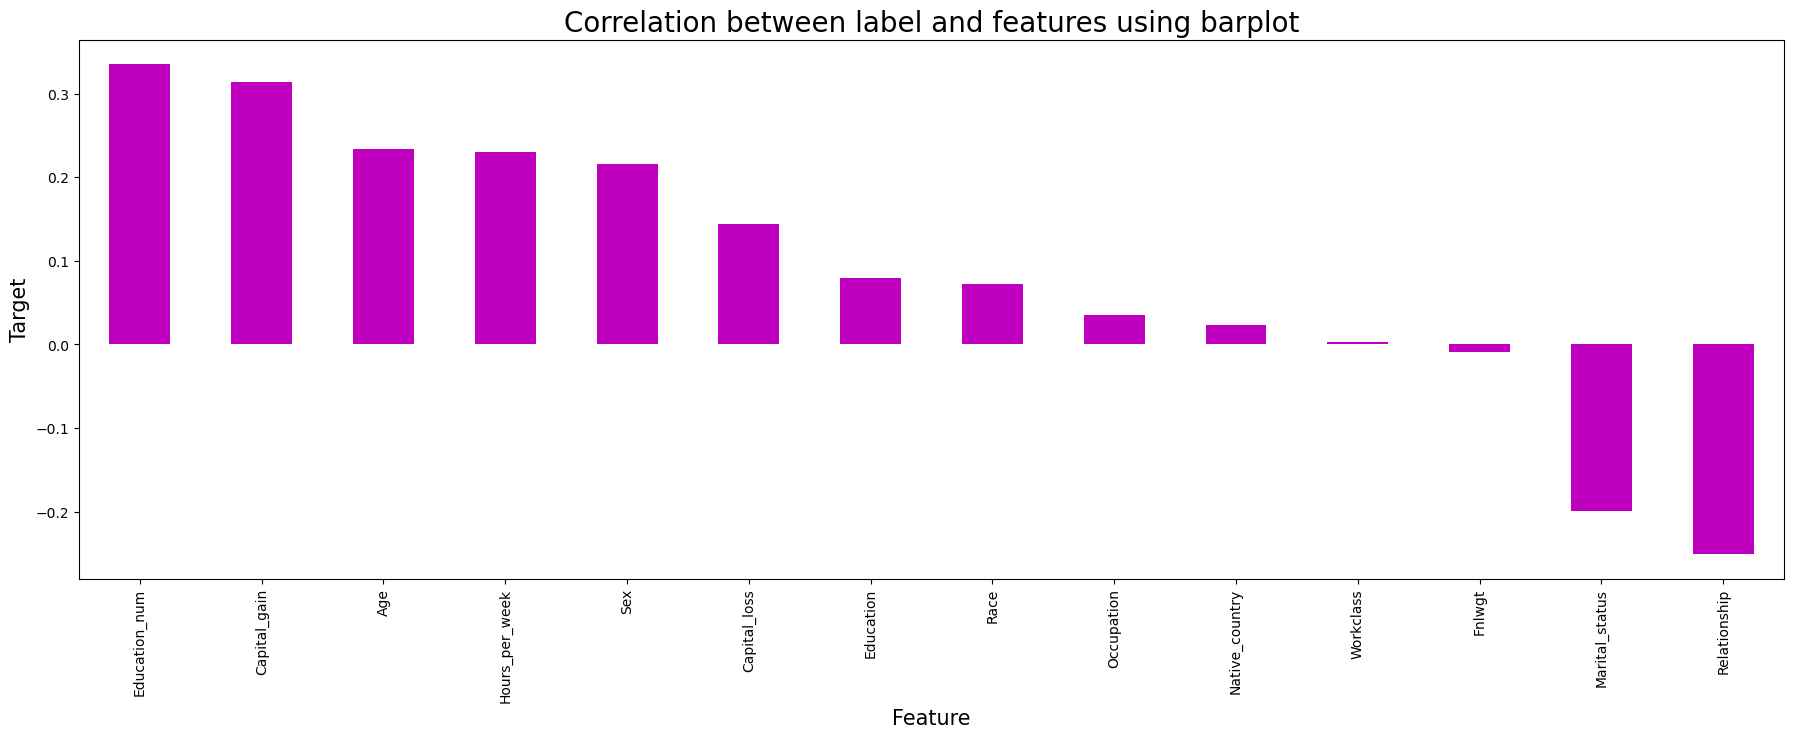

In [73]:
plt.figure(figsize=(22,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar', color="m")
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title("Correlation between label and features using barplot", fontsize = 20)
plt.show()

# Separating features and label

In [74]:
x = df.drop("Income",axis = 1)
y = df["Income"]

# Feature scaling using standard Scalarization

In [75]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.837097,1.721336,-1.008742,-0.335443,1.134779,-0.406183,-0.790156,-0.900177,0.393675,0.703087,-0.278624,-0.220559,-2.222120,0.261374
1,-0.042640,-0.085223,0.245046,0.181319,-0.420027,-1.734026,-0.286703,-0.277810,0.393675,0.703087,-0.278624,-0.220559,-0.035430,0.261374
2,1.057031,-0.085223,0.425770,-2.402489,-1.197429,-0.406183,-0.286703,-0.900177,-1.962583,0.703087,-0.278624,-0.220559,-0.035430,0.261374
3,-0.775755,-0.085223,1.408146,-0.335443,1.134779,-0.406183,0.720204,2.211658,-1.962583,-1.422298,-0.278624,-0.220559,-0.035430,-5.352855
4,-0.115952,-0.085223,0.898170,0.439700,1.523480,-0.406183,-0.790156,2.211658,0.393675,-1.422298,-0.278624,-0.220559,-0.035430,0.261374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.849066,-0.085223,0.639710,-0.852204,0.746077,-0.406183,1.475385,2.211658,0.393675,-1.422298,-0.278624,-0.220559,-0.197407,0.261374
32556,0.103982,-0.085223,-0.335466,0.181319,-0.420027,-0.406183,-0.034976,-0.900177,0.393675,0.703087,-0.278624,-0.220559,-0.035430,0.261374
32557,1.423589,-0.085223,-0.358811,0.181319,-0.420027,2.249503,-1.545336,1.589291,0.393675,-1.422298,-0.278624,-0.220559,-0.035430,0.261374
32558,-1.215624,-0.085223,0.110927,0.181319,-0.420027,0.921660,-1.545336,0.966924,0.393675,0.703087,-0.278624,-0.220559,-1.655200,0.261374


# Checking Variance Inflation Factor (VIF)

In [76]:
# Finding variance inflation factor in each scaled column i.e. , x.shape[1], (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.166666,Age
1,1.009537,Workclass
2,1.013718,Fnlwgt
3,1.159753,Education
4,1.224966,Education_num
5,1.127862,Marital_status
6,1.015491,Occupation
7,1.681284,Relationship
8,1.032620,Race
9,1.561922,Sex


In [77]:
y.value_counts()

0.0    24719
1.0     7841
Name: Income, dtype: int64

# Oversampling

In [78]:
from imblearn.over_sampling import SMOTE

SM = SMOTE()

x1, y1 = SM.fit_resample(x,y)

In [79]:
# Checking value count of target column

y.value_counts()

0.0    24719
1.0     7841
Name: Income, dtype: int64

In [80]:
y1.value_counts()

0.0    24719
1.0    24719
Name: Income, dtype: int64

# Modelling

# Finding the best random state

In [82]:
''''''''''from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print(" Best accuracy is ", maxAccu, " At random state ", maxRS)'''''''''
    

KeyboardInterrupt: 

# Creating train test split

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 19)

# Classification algorithms

In [84]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [85]:
# Checking accuracy for RandomForestClassifier 
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))


0.8588247338247338
[[6896  467]
 [ 912 1493]]
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      7363
         1.0       0.76      0.62      0.68      2405

    accuracy                           0.86      9768
   macro avg       0.82      0.78      0.80      9768
weighted avg       0.85      0.86      0.85      9768



# LogisticRegression

In [86]:
# Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))


0.8226863226863227
[[6948  415]
 [1317 1088]]
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      7363
         1.0       0.72      0.45      0.56      2405

    accuracy                           0.82      9768
   macro avg       0.78      0.70      0.72      9768
weighted avg       0.81      0.82      0.81      9768



# Support Vector Machine Classifier

In [87]:
# Checking accuracy for support vector machine classifier 
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))


0.847972972972973
[[6988  375]
 [1110 1295]]
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      7363
         1.0       0.78      0.54      0.64      2405

    accuracy                           0.85      9768
   macro avg       0.82      0.74      0.77      9768
weighted avg       0.84      0.85      0.84      9768



# Gradient Boosting Classifier

In [88]:
# Checking accuracy for Gradient Boosting classifier 
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))


0.8656838656838657
[[7026  337]
 [ 975 1430]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      7363
         1.0       0.81      0.59      0.69      2405

    accuracy                           0.87      9768
   macro avg       0.84      0.77      0.80      9768
weighted avg       0.86      0.87      0.86      9768



# # AdaBoost Classifier 

In [89]:
# Checking accuracy for AdaBoost classifier 
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))


0.8627149877149877
[[6983  380]
 [ 961 1444]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      7363
         1.0       0.79      0.60      0.68      2405

    accuracy                           0.86      9768
   macro avg       0.84      0.77      0.80      9768
weighted avg       0.86      0.86      0.86      9768



# Bagging Classifier

In [90]:
# Checking accuracy for Bagging classifier 
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))


0.8481777231777232
[[6889  474]
 [1009 1396]]
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      7363
         1.0       0.75      0.58      0.65      2405

    accuracy                           0.85      9768
   macro avg       0.81      0.76      0.78      9768
weighted avg       0.84      0.85      0.84      9768



# Extra Trees Classifier

In [91]:
# Checking accuracy for Extra Tree classifier 
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))


0.8473587223587223
[[6803  560]
 [ 931 1474]]
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      7363
         1.0       0.72      0.61      0.66      2405

    accuracy                           0.85      9768
   macro avg       0.80      0.77      0.78      9768
weighted avg       0.84      0.85      0.84      9768



# Cross Validation score

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
# Checking for cv score for Random Forest Classifier 
score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predRFC) - score.mean())

[0.83272654 0.87570793 0.92789239 0.93456053 0.92839082]
0.8998556422198677
Difference between Accuracy score and cross validation score is - -0.0410309083951339


In [94]:
# Checking for cv score for logistic regression
score = cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predLR) - score.mean())

[0.76274272 0.76800162 0.77174353 0.77070901 0.77202387]
0.7690441491278633
Difference between Accuracy score and cross validation score is - 0.05364217355845935


In [95]:
# Checking for cv score for Gradient Boosting
score = cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predGB) - score.mean())

[0.82109628 0.85578479 0.88228155 0.88560736 0.88044907]
0.8650438118211519
Difference between Accuracy score and cross validation score is - 0.0006400538627138186


In [97]:
# Checking for cv score for support vector machine classifier
score = cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predsvc) - score.mean())

KeyboardInterrupt: 

In [98]:
# Checking for cv score for Ada Boosting Classifier
score = cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predABC) - score.mean())

[0.8121966  0.84243528 0.86589806 0.86922221 0.86396278]
0.8507429851333008
Difference between Accuracy score and cross validation score is - 0.011972002581686847


In [99]:
# Checking for cv score for Bagging Classifier
score = cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predBC) - score.mean())

[0.79824029 0.85750405 0.91545307 0.92404167 0.91463538]
0.8819748923351673
Difference between Accuracy score and cross validation score is - -0.03379716915744413


In [100]:
# Checking for cv score for Extra Trees Classifier
score = cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predET) - score.mean())

[0.86650485 0.88834951 0.93133091 0.9321331  0.9285931 ]
0.9093822962420333
Difference between Accuracy score and cross validation score is - -0.06202357388331092


Extra Trees Classifier is our best model as the difference between accuracy and cross validation score is least.

# Hyper Parameter Tuning 

In [101]:
# Extra Trees Classifier 
from sklearn.model_selection import GridSearchCV
parameters = { 'criterion':['gini', 'entropy'],
             'random_state':[10,50,1000],
             'max_depth':[0,10,20],
             'n_jobs':[-2,-1,1],
             'n_estimators':[50,100,200,300]}

In [102]:
GCV=GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [103]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [104]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 10}

In [105]:
Final_model = ExtraTreesClassifier(criterion='gini',random_state=10,max_depth=20,n_jobs=-2,n_estimators=300)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

86.06674856674856


In [106]:
Final_model = ExtraTreesClassifier(criterion='entropy',random_state=10,max_depth=20,n_jobs=-2,n_estimators=300)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

85.98484848484848


# Plotting ROC and compare AUC for all the models used

In [107]:
# Plotting for all the models used here 
from sklearn import datasets
from sklearn import metrics 
from sklearn import model_selection 




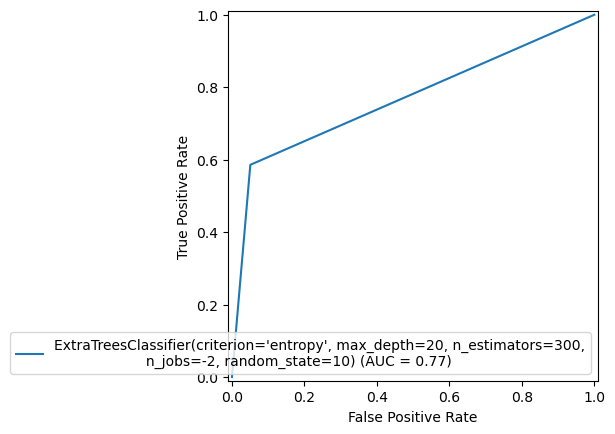

In [108]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = roc_auc, estimator_name = Final_model)
display.plot()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 79% 

# Saving the model

In [109]:
# Saving the model using .pkl

import joblib
joblib.dump(Final_model, "Census_income.pkl")

['Census_income.pkl']

# Predicting the saved model

In [110]:
# Let's load the saved model and get the prediction 

model = joblib.load("Census_income.pkl")

# Prediction 

prediction = model.predict(x_test)
prediction

array([1., 0., 0., ..., 0., 1., 0.])

# Actual v/s predicted

In [111]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,1.0,1.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
9763,1.0,1.0
9764,0.0,0.0
9765,0.0,1.0
9766,1.0,1.0
